In [2]:
import sys
sys.path.append('../src/')

import itertools

%load_ext autoreload
%autoreload 2

from transfer_learning import *

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
directory = '/cluster/tufts/hugheslab/eharve06/encoded_Dataset_BUSI_with_GT/'
# [normal, benign, malignant]
columns = ['n', 'random_state', 'train_BA', 'train_auroc', 'val_BA', 'val_auroc', 'test_BA', 'test_auroc']
df = pd.DataFrame(columns=columns)
ns = [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]
random_states = [1001, 2001, 3001]
for model_index, (n, random_state) in enumerate(itertools.product(ns, random_states)):
    train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc = train_and_tune(directory, n, random_state)
    row = [n, random_state, train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc]
    df.loc[model_index] = row
    print(df.loc[model_index])
df.to_csv('Dataset_BUSI_with_GT.csv')
df.head()

In [3]:
df = pd.read_csv('/cluster/home/eharve06/neural-scaling-laws/notebooks/Dataset_BUSI_with_GT.csv', index_col='Unnamed: 0')
df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.head()

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.84643735, 0.76895206, 0.82362155]","[0.87100737, 0.81215162, 0.87531328]","[0.84482759, 0.73948949, 0.83734403]","[0.94367816, 0.81456456, 0.89037433]"
1,200,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.88474295, 0.75694444, 0.89213564]","[0.92703151, 0.79388889, 0.92712843]","[0.85504202, 0.71645022, 0.73744113]","[0.8487395, 0.84776335, 0.8744113]"
2,200,3001,"[1.0, 0.99122807, 1.0]","[1.0, 0.99877601, 1.0]","[0.91448692, 0.78142857, 0.8984375]","[0.9305835, 0.82, 0.95684524]","[0.74315068, 0.65646259, 0.84048507]","[0.94901065, 0.83965015, 0.93283582]"
3,240,1001,"[0.98550725, 0.99125619, 0.96721311]","[0.99809691, 0.99963567, 0.99322282]","[0.85995086, 0.76978818, 0.84962406]","[0.86486486, 0.80824972, 0.88533835]","[0.9137931, 0.70983483, 0.76247772]","[0.95402299, 0.85135135, 0.89215686]"
4,240,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.9274461, 0.79861111, 0.90692641]","[0.94941957, 0.82111111, 0.95598846]","[0.87710084, 0.76839827, 0.73861852]","[0.85504202, 0.84704185, 0.87990581]"


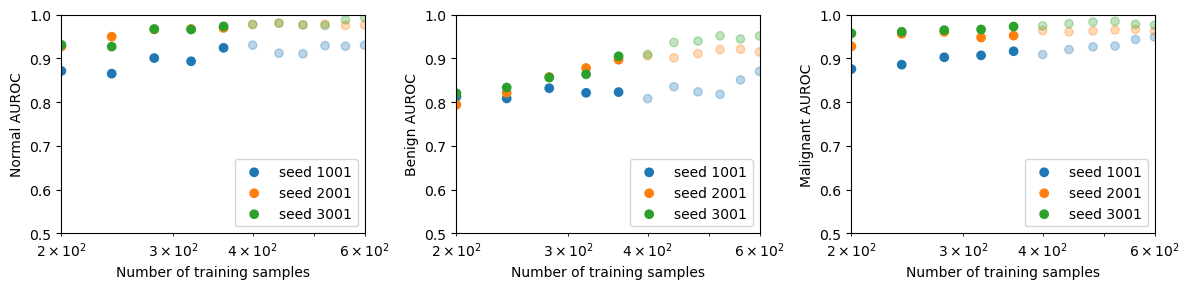

In [4]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
labels = ['Normal', 'Benign', 'Malignant']
alphas = [1,1,1,1,1,0.3,0.3,0.3,0.3,0.3,0.3]
for index in range(3):
    axs[index].scatter(df.n[df.random_state==1001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==1001].to_list())[:,index], label='seed 1001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==2001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==2001].to_list())[:,index], label='seed 2001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==3001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==3001].to_list())[:,index], label='seed 3001', alpha=alphas)
    axs[index].set_xlim([200, 600])
    axs[index].set_ylim([0.5, 1.0])
    axs[index].set_xscale('log')
    axs[index].set_xlabel('Number of training samples')
    axs[index].set_ylabel('{} AUROC'.format(labels[index]))
    axs[index].legend(loc='lower right')
fig.tight_layout()
plt.show()

In [12]:
directory = '/cluster/tufts/hugheslab/eharve06/encoded_chest_xray/'
# [normal, pneumonia]
columns = ['n', 'random_state', 'train_BA', 'train_auroc', 'val_BA', 'val_auroc', 'test_BA', 'test_auroc']
df = pd.DataFrame(columns=columns)
ns = [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]
#ns = [200, 240, 280, 320, 360, 800, 1600, 3200]
random_states = [1001, 2001, 3001]
for model_index, (n, random_state) in enumerate(itertools.product(ns, random_states)):
    train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc = train_and_tune(directory, n, random_state)
    row = [n, random_state, train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc]
    df.loc[model_index] = row
    print(df.loc[model_index])
df.to_csv('chest_xray.csv')
df.head()

0.01
n                                                             200
random_state                                                 1001
train_BA        [0.9737949272749129, 0.87786029706945, 0.87818...
train_auroc     [0.9948311095083544, 0.9366720192693697, 0.935...
val_BA          [0.9254902826205293, 0.8104049487096813, 0.686...
val_auroc       [0.9766812317017551, 0.8622744479871983, 0.732...
test_BA         [0.8939762780338738, 0.796977141191656, 0.7105...
test_auroc      [0.9659449940436111, 0.8735479035683057, 0.798...
Name: 0, dtype: object
0.01
n                                                             200
random_state                                                 2001
train_BA        [0.9546913104864587, 0.852368526696106, 0.8761...
train_auroc     [0.9903735078937235, 0.9271376957045363, 0.932...
val_BA          [0.8913308913308913, 0.7867620549797206, 0.742...
val_auroc       [0.9645182859468574, 0.8376520955385309, 0.812...
test_BA         [0.8838987099856666, 0.7362

0.01
n                                                             400
random_state                                                 1001
train_BA        [0.9597933513027852, 0.8602765556253928, 0.821...
train_auroc     [0.9919458349377487, 0.9215084852294155, 0.900...
val_BA          [0.9414971090612172, 0.8142920264154099, 0.723...
val_auroc       [0.9849347515852349, 0.8710397783589485, 0.777...
test_BA         [0.906283990262599, 0.8215274597160345, 0.7682...
test_auroc      [0.9711892059874657, 0.8944809926302203, 0.836...
Name: 15, dtype: object
0.01
n                                                             400
random_state                                                 2001
train_BA        [0.9482593814560143, 0.8456192134009435, 0.832...
train_auroc     [0.9908112608306867, 0.9275461035848532, 0.916...
val_BA          [0.9186071864643294, 0.7845313204146012, 0.768...
val_auroc       [0.972178615035758, 0.8548670572329878, 0.8220...
test_BA         [0.914541979759371, 0.7636

0.01
n                                                             600
random_state                                                 1001
train_BA        [0.9661931818181818, 0.8589805040630469, 0.820...
train_auroc     [0.9938494318181819, 0.9238443446177169, 0.904...
val_BA          [0.9442850627473481, 0.8125067173001828, 0.744...
val_auroc       [0.9854349649115064, 0.875303024874909, 0.8001...
test_BA         [0.9140790904853162, 0.8378388225007287, 0.790...
test_auroc      [0.9741932977676491, 0.9027980180705334, 0.855...
Name: 30, dtype: object
0.1
n                                                             600
random_state                                                 2001
train_BA        [0.9912367724867726, 0.9421875, 0.941083176691...
train_auroc     [0.9986359126984127, 0.986328125, 0.9825099859...
val_BA          [0.9492194313622886, 0.8056894997746733, 0.753...
val_auroc       [0.9879789522646665, 0.868386660657954, 0.8180...
test_BA         [0.953778105952019, 0.78056

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[0.9737949272749129, 0.87786029706945, 0.87818...","[0.9948311095083544, 0.9366720192693697, 0.935...","[0.9254902826205293, 0.8104049487096813, 0.686...","[0.9766812317017551, 0.8622744479871983, 0.732...","[0.8939762780338738, 0.796977141191656, 0.7105...","[0.9659449940436111, 0.8735479035683057, 0.798..."
1,200,2001,"[0.9546913104864587, 0.852368526696106, 0.8761...","[0.9903735078937235, 0.9271376957045363, 0.932...","[0.8913308913308913, 0.7867620549797206, 0.742...","[0.9645182859468574, 0.8376520955385309, 0.812...","[0.8838987099856666, 0.7362001825724223, 0.697...","[0.9671198366850541, 0.829375671646965, 0.7611..."
2,200,3001,"[0.9672325305961311, 0.8581549593005728, 0.871...","[0.9769706540334255, 0.935483870967742, 0.9268...","[0.9222316794106156, 0.8040823795581582, 0.706...","[0.9726516715968075, 0.8627229172211871, 0.748...","[0.8999999999999999, 0.7807357443551474, 0.709...","[0.9777407847800238, 0.8526717374665137, 0.797..."
3,240,1001,"[0.9607170099160947, 0.841095314797955, 0.8645...","[0.9911856937028561, 0.9196022130401289, 0.910...","[0.9261596857483338, 0.8014067519315969, 0.693...","[0.9775639611010578, 0.8650807867301973, 0.747...","[0.8928626922877713, 0.8157919390431778, 0.718...","[0.9669031957321179, 0.8741724611733356, 0.811..."
4,240,2001,"[0.9477533960292581, 0.83203125, 0.86661833997...","[0.9883315917798676, 0.9200613839285715, 0.926...","[0.9006628292342578, 0.7859283461018476, 0.742...","[0.9684283969998255, 0.8477016674177558, 0.811...","[0.8927883710492406, 0.7483100495718793, 0.717...","[0.9685531859444902, 0.8399371396216821, 0.764..."


In [7]:
df = pd.read_csv('/cluster/home/eharve06/neural-scaling-laws/notebooks/chest_xray_short_range.csv', index_col='Unnamed: 0')
df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
df.head()

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[0.97379493, 0.8778603, 0.87818106]","[0.99483111, 0.93667202, 0.93505771]","[0.92549028, 0.81040495, 0.68619405]","[0.97668123, 0.86227445, 0.73224544]","[0.89397628, 0.79697714, 0.71056858]","[0.96594499, 0.8735479, 0.79811388]"
1,200,2001,"[0.95469131, 0.85236853, 0.87613913]","[0.99037351, 0.9271377, 0.9324862]","[0.89133089, 0.78676205, 0.74260642]","[0.96451829, 0.8376521, 0.81236823]","[0.88389871, 0.73620018, 0.69763973]","[0.96711984, 0.82937567, 0.76110717]"
2,200,3001,"[0.96723253, 0.85815496, 0.87152778]","[0.97697065, 0.93548387, 0.92683532]","[0.92223168, 0.80408238, 0.70669262]","[0.97265167, 0.86272292, 0.74853827]","[0.9, 0.78073574, 0.70960259]","[0.97774078, 0.85267174, 0.79766859]"
3,240,1001,"[0.96071701, 0.84109531, 0.86453425]","[0.99118569, 0.91960221, 0.91074665]","[0.92615969, 0.80140675, 0.69346948]","[0.97756396, 0.86508079, 0.74785367]","[0.89286269, 0.81579194, 0.71892159]","[0.9669032, 0.87417246, 0.81119591]"
4,240,2001,"[0.9477534, 0.83203125, 0.86661834]","[0.98833159, 0.92006138, 0.926332]","[0.90066283, 0.78592835, 0.74270614]","[0.9684284, 0.84770167, 0.81155621]","[0.89278837, 0.74831005, 0.71732837]","[0.96855319, 0.83993714, 0.76440092]"


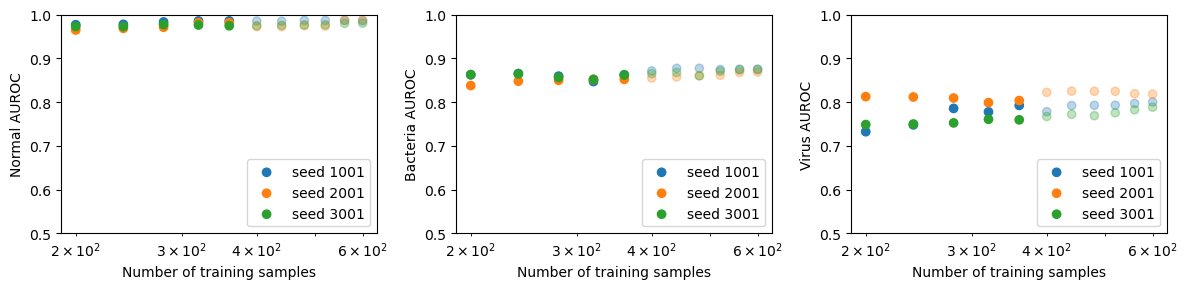

In [8]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
labels = ['Normal', 'Bacteria', 'Virus']
alphas = [1,1,1,1,1,0.3,0.3,0.3,0.3,0.3,0.3]
for index in range(3):
    axs[index].scatter(df.n[df.random_state==1001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==1001].to_list())[:,index], label='seed 1001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==2001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==2001].to_list())[:,index], label='seed 2001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==3001].to_numpy(), \
                       np.array(df.val_auroc[df.random_state==3001].to_list())[:,index], label='seed 3001', alpha=alphas)
    axs[index].set_ylim([0.5, 1.0])
    axs[index].set_xscale('log')
    axs[index].set_xlabel('Number of training samples')
    axs[index].set_ylabel('{} AUROC'.format(labels[index]))
    axs[index].legend(loc='lower right')
fig.tight_layout()
plt.show()